In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(['Id'],1,inplace=True)

In [6]:
df.rename(columns={'species':'label'},inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.dropna(inplace=True)

In [8]:
def train_test_split(df,test_size):
    
    if isinstance(test_size, float):
        test_size=round(test_size*len(df))
        
    indices=df.index.tolist()
    test_indices=random.sample(population=indices,k=test_size)
    
    test_df=df.loc[test_indices]
    train_df=df.drop(test_indices)    
    
    return train_df, test_df

In [16]:
random.seed(0)
train_df,test_df = train_test_split(df,20)

In [17]:
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [22]:
#pure data is the data for which all elements have same label
def is_pure(data):
    label_column=data[:,-1]
    unique_classes=np.unique(label_column)
    
    return (len(unique_classes)==1)

In [23]:
is_pure(train_df.values)#should return false as it contain all classes

False

In [26]:
def classify_data(data):
    label_columns=data[:,-1]
    unique_classes, unique_classes_count=np.unique(label_columns,return_counts=True)
    index=unique_classes_count.argmax()
    classification = unique_classes[index]
    
    return classification
    

In [29]:
classify_data(train_df[train_df.petal_width>1.2].values)

'Iris-virginica'

In [30]:
###potential splits

In [33]:
def get_potential_splits(data):
    potential_splits = {}
    _,n_columns = data.shape
    
    for column_index in range(n_columns-1):
        potential_splits[column_index]=[]
        values=data[:,column_index]
        unique_values=sorted(np.unique(values))
        
        for index in range(1,len(unique_values)):
            current_value=unique_values[index]
            prev_value=unique_values[index-1]
            potential_split=(current_value+prev_value)/2
            
            potential_splits[column_index].append(potential_split)
            
    return potential_splits
        
    

In [34]:
potential_splits=get_potential_splits(train_df.values)

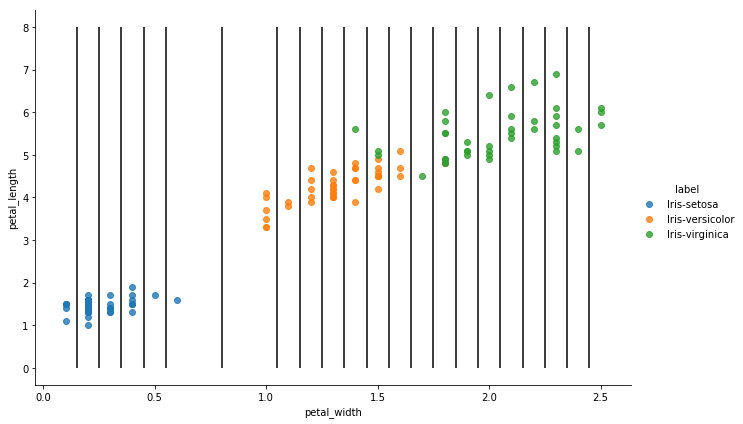

In [49]:
sns.lmplot(data=train_df,x='petal_width', y='petal_length',fit_reg=False,hue='label',height=6,aspect=1.5)
plt.vlines(x=potential_splits[3],ymin=0,ymax=8)
plt.show()

In [45]:
#the vertical lines shows all the possible combinations by which data can be sorted